In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os.path
from astropy.io import fits
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 100em; }</style>"))
# ^This import is to have a larger display on the output, I'm not sure how to
# do that in Notebook

# find and open the flat FITS files that were exposed for 30% saturation and store them all in one list
file_prefix = "lab1_3_3_series.0000000"
file_end = ".FIT"
flat_data = [None]*10
for i in range(0, 10, 1):
    filename = file_prefix + str(i) + file_end
    list = fits.open('images/'+filename)
    image_data = list[0].data
    flat_data[i] = image_data


In this box I just opened up all of the flat images and stored them in a list, so I can use this list to find the median of the values.

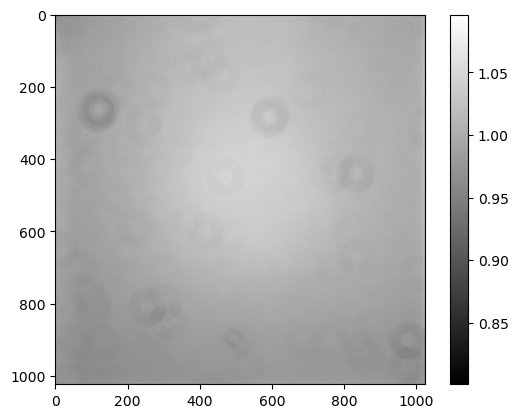

In [8]:
from scipy import stats

median_values = []
values = [flat_data[x] for x in range(0,10)]
# print(values)
median_values.append(np.median(values, axis=0))
median_values = median_values[0]

flat_median = median_values.flatten()
mode = stats.mode(flat_median, keepdims=True)
norm_flat = median_values / mode[0]

plt.imshow(norm_flat, cmap='gray')
plt.colorbar()

In this box I just calculated the median value of each pixel for the flat fields. I did this quicker than the method I had before by not listing through every single pixel. When I did this it creates an array of the shape (1, 1024, 1024), so I just reassigned it so that it has the shape (1024, 1024). We then find the mode of the median values and normalize the flat-field to this level

In [17]:
hdu = fits.PrimaryHDU(norm_flat)
hdu.writeto("norm_flats.fits", overwrite=True)

dark_norm = 0.963
bright_norm = 1.051
bright_norm_ratio = dark_norm / bright_norm

center_norm = 1.042
corner_norm = 1.006
loc_norm_ratio = center_norm / corner_norm
loc_mag = -2.5 * np.log(loc_norm_ratio)

print(f"The fraction of light received from the dark areas compared to the brightest areas is {bright_norm_ratio:.3f}")
print(f"Difference in magnitude from center and corner spot is {loc_mag:.3f}")

The fraction of light received from the dark areas compared to the brightest areas is 0.916
Difference in magnitude from center and corner spot is -0.088


I did the ds9 part of the lab here to find the values of the pixels in the brightest and darkest areas, and the center and corner areas. To find how many counts these spots have relative to each other I just found the ratio. The darkest parts of our image are only receiving about 91.6% of the light. I then also found the ratio of light in the center and the corner of the image, so we can use the formula $$\Delta m=m_{center}-m_{corner}=-2.5log(\frac{F_{center}}{F_{corner}})=-0.088$$ 
I also have it to where the code saves the file if it doesn't already exist, so that we can analyze it in ds9 as a fits file. Then we can save that png to show how it looks in the ds9

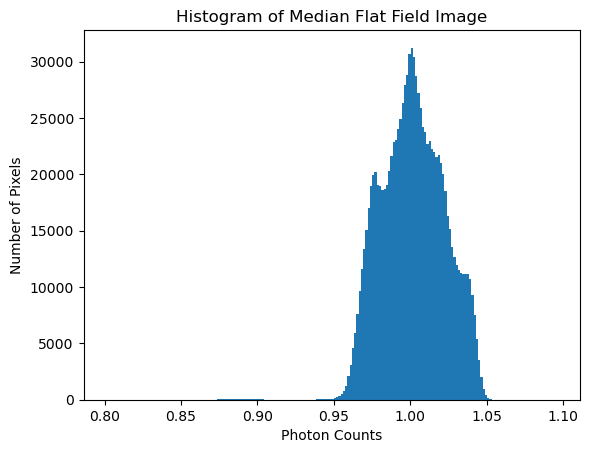

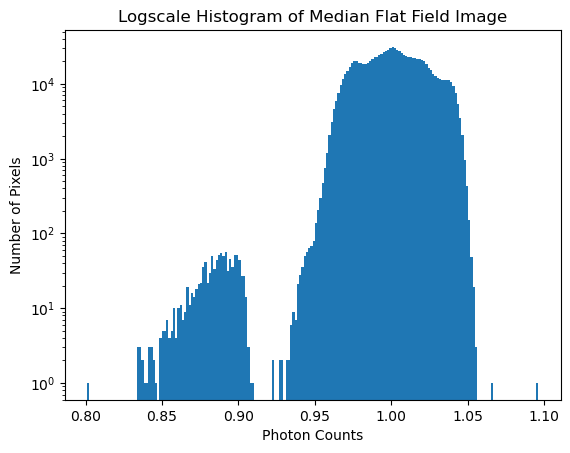

In [18]:
flat_median = norm_flat.flatten()
histogram = plt.hist(flat_median, range=(np.min(flat_median), np.max(flat_median)), bins=200)
plt.xlabel('Photon Counts')
plt.ylabel("Number of Pixels")
plt.title("Histogram of Median Flat Field Image")
plt.show()
histogram = plt.hist(flat_median, range=(np.min(flat_median), np.max(flat_median)), bins=200)
plt.xlabel('Photon Counts')
plt.ylabel("Number of Pixels")
plt.title("Logscale Histogram of Median Flat Field Image")
plt.yscale("log")
plt.show()

Here we're just plotting a histogram of our mamster flat data to see if there are any dead pixels. The lowest pixel seems to be at around 80% of the mode value, which is certainly not dead, so there isn't really any dead pixels here. We can also see that its not necessarily bimodal, but there is a good amount of data between 0.83 and 0.92 of the mode.

If you forgot to take flats on the night of observation, you can't really take falt-fields on another night. The focus of the telescope might have changed, there could be more or less dust on the telescope, etc. These things are supposed to be corrected by the flat field, so it's important that the flat-field is taken with as close to the exact conditions that the photos were taken, which would be in the same night.